In [1]:
import sidmhalo
from sidmhalo.classes import load_profile
import os
import matplotlib.pyplot as plt

import numpy as np

# test the saving and loading functionality 

## basic test 

In [2]:
rm = 30 # radius of isothermal core, kpc
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless
Phi_b = None # baryon potential, Msun/kpc^2

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_sph, Phi_b=Phi_b)

In [3]:
filename = 'data/test_profile.npz'

profile.save(filename)

[DEBUG] Saving named function: Phi_b_out, signature: (r)
[DEBUG] Saving named function: no_baryons, signature: (r)
[DEBUG] Saving named function: q_eff, signature: (r)


In [4]:
# loading the profile
lprofile = load_profile(filename)

[DEBUG] Loaded named function: no_baryons, signature: (r)


In [8]:
lprofile.rho_sph_avg(100)

36731.99447813377

In [7]:
type(lprofile)

sidmhalo.classes.profile

In [10]:
lprofile.r1

np.float64(30.0)

## test with baryon function 

In [2]:
from sidmhalo.definitions import GN

In [3]:
rm = 30 # radius of isothermal core, kpc
M200 = 1e12 # virial mass, Msun
R200 = 200 # virial radius, kpc
c = 10 # concentration, dimensionless
q_sph = 1 # spherical axis ratio, dimensionless

# def Phi_b(r, th):
#     Md = 6.4e10
#     a = 3.5
#     b = 0.53
#     return -GN*Md/np.sqrt(r**2 * np.sin(th)**2 + (a + np.sqrt(b**2 + r**2 * np.cos(th)**2))**2)

profile = sidmhalo.gen.squashed(rm, M200, c, q0=q_sph, Phi_b=None)

if profile:
    print("Profile generated successfully")

relaxation (in /home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/spherical.py) took 1.640 seconds.
Profile generated successfully


In [4]:
r = np.linspace(1, 30, 10) # kpc
test = profile.V(r)

[Vsq_LM] rho_LM(r_eval[:3]): [array(42598229.5899296), array(36769488.01108311), array(27573006.13354478)]


/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/classes.py:379: RuntimeWarning: divide by zero encountered in log
  y = np.log(np.abs(rho_LM_list[sel]))


[Vsq_LM] rho_LM(r_eval[:3]): [array(-4.36827315e-07), array(-3.57494931e-08), array(1.96301824e-07)]
[Vsq_LM] WARNING: ODE solver did not return value for r=30.0. Filling with np.nan.
[Vsq_LM] rho_LM(r_eval[:3]): [array(-8.77483559e-08), array(-6.2671875e-08), array(-8.21690709e-08)]
[Vsq_LM] rho_LM(r_eval[:3]): [array(6.73205643e-08), array(-1.56721919e-07), array(7.4307569e-08)]


KeyboardInterrupt: 

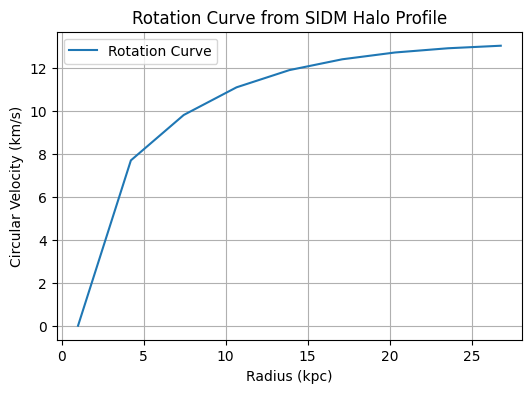

In [5]:
plt.figure(figsize=(6, 4))
plt.plot(r, np.sqrt(test), label='Rotation Curve')
plt.xlabel('Radius (kpc)')
plt.ylabel('Circular Velocity (km/s)')
plt.title('Rotation Curve from SIDM Halo Profile')
plt.legend()
plt.grid()
plt.show()

In [5]:
r = np.linspace(1, 30 , 20)
rotation_curve_4 = profile.Vsq_LM(r, 4)

print(rotation_curve_4)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/classes.py:361: RuntimeWarning: invalid value encountered in log
  inner_slope = np.log(rho_LM_list[1] / rho_LM_list[0]) / np.log(
/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/.jeansenv/lib/python3.13/site-packages/scipy/integrate/_ivp/common.py:132: RuntimeWarning: divide by zero encountered in scalar divide
  h1 = (0.01 / max(d1, d2)) ** (1 / (order + 1))


[Vsq_LM] r_eval: [ 1.          2.52631579  4.05263158  5.57894737  7.10526316  8.63157895
 10.15789474 11.68421053 13.21052632 14.73684211 16.26315789 17.78947368
 19.31578947 20.84210526 22.36842105 23.89473684 25.42105263 26.94736842
 28.47368421 30.        ]
[Vsq_LM] rmin: 0 rmax: 30.0
[Vsq_LM] L: 4
[Vsq_LM] rho_LM(r_eval[:3]): [array(12972548.85373848), array(13306789.72893339), array(5420840.79157161)]
[Vsq_LM] solution.t: []


AttributeError: 'list' object has no attribute 'shape'

In [8]:
r = np.linspace(1, 30, 50) # kpc
rotation_curve_0 = profile.Vsq_LM(r, 0) 
rotation_curve_2 = profile.Vsq_LM(r, 0) + profile.Vsq_LM(r, 2)

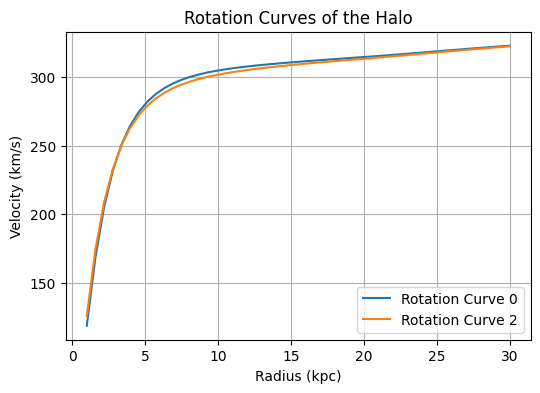

In [9]:
plt.figure(figsize=(6, 4))
plt.plot(r, rotation_curve_0**(0.5), label='Rotation Curve 0')
plt.plot(r, rotation_curve_2**(0.5), label='Rotation Curve 2')
plt.xlabel('Radius (kpc)')
plt.ylabel('Velocity (km/s)')
plt.title('Rotation Curves of the Halo')
plt.legend()
plt.grid()
plt.show()

In [10]:
check = profile.Vsq_LM(r, 1) # should be 0 
print(check)

/home/asorlik/Desktop/github-projects/nonspherical-sidm-jeans-model/src/sidmhalo/classes.py:397: RuntimeWarning: invalid value encountered in log
  outer_slope = np.log(rho_LM_list[-1] / rho_LM_list[-2]) / np.log(


[ 7.57034306e-09 -7.77866444e-09  1.03186032e-07  7.54507586e-08
  1.72430704e-09 -7.94069420e-08 -1.19745397e-07 -1.00050351e-07
 -5.86378957e-08 -1.79524360e-08  2.16275978e-08  5.83544478e-08
  8.27620320e-08  8.63085604e-08  7.94441617e-08  6.94379851e-08
  5.94394750e-08  5.06916016e-08  4.39531574e-08  3.85890660e-08
  3.41233352e-08  3.02292342e-08  2.66605818e-08  2.32036253e-08
  1.97876865e-08  1.68427562e-08  1.45122903e-08  1.30036348e-08
  1.26045492e-08  1.35938779e-08  1.61373360e-08  2.01707953e-08
  2.53583793e-08  3.11338231e-08  3.61896334e-08  3.93164598e-08
  4.10410615e-08  4.18638295e-08  4.21487589e-08  4.21295601e-08
  4.19395707e-08  4.16476938e-08  4.12768353e-08  4.08123547e-08
  4.01989849e-08  3.93176264e-08  3.79250415e-08  3.55200403e-08
  3.13581649e-08  2.35528901e-08]


In [4]:
Phi_b(1,0)

np.float64(-59443.38503988109)

In [5]:
profile.outer.Phi_b(1,0)  # potential at (R,z) = (8,0) kpc

np.float64(-59443.38503988109)

In [6]:
filename = "test_profile_w_baryons.npz"
profile.save(filename) 

In [7]:
lprofile = load_profile(filename)

In [8]:
print(f'Before save Phi_b(1,0): {profile.outer.Phi_b(1,0)}, and after the save Phi_b(1,0): {lprofile.outer.Phi_b(1,0)}') 
print(f'Before save Phi_b(1): {profile.inner.Phi_b(1)}, and after the save Phi_b(1,0): {lprofile.inner.Phi_b(1)}') 
print(f'Before save q(1): {profile.q(1)}, and after the save q(1): {lprofile.q(1)}') 

Before save Phi_b(1,0): -59443.38503988109, and after the save Phi_b(1,0): -59443.38503988109
Before save Phi_b(1): -63497.85674532449, and after the save Phi_b(1,0): 0
Before save q(1): 0.49711458991388163, and after the save q(1): 1


In [19]:
print(f'Before M200: {profile.outer.M200}, and after M200: {lprofile.outer.M200}')

Before M200: 1000000000000.0, and after M200: 1000000000000.0


In [11]:
profile.inner.Phi_b(1)

-63497.85674532449

In [22]:
import inspect

In [26]:
inspect.signature(profile.inner.Phi_b)

<Signature (r)>

In [25]:
inspect.signature(lprofile.inner.Phi_b)

<Signature (r)>